<a href="https://colab.research.google.com/github/lauramazzu/hackbio-biocoding-internship/blob/main/Task_Code_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Load data
data_url = "https://raw.githubusercontent.com/HackBio-Internship/2025_project_collection/refs/heads/main/Python/Dataset/mcgc.tsv"
data = pd.read_csv(data_url, sep="\t")

In [3]:
data.head()

,time,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12
0,0,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
1,15,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
2,30,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
3,45,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
4,60,0.003,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002


In [4]:
# Load metadata for strain information
metadata_url = "https://raw.githubusercontent.com/HackBio-Internship/2025_project_collection/refs/heads/main/Python/Dataset/mcgc_METADATA.txt"
metadata = pd.read_csv(metadata_url, sep="\t")
metadata

,Strain,WT,MUT,WT.1,MUT.1,WT.2,MUT.2
0,Strain1_Rep1,A1,A2,B1,B2,C1,C2
1,Strain1_Rep2,A3,A4,B3,B4,C3,C4
2,Strain2_Rep1,A5,A6,B5,B6,C5,C6
3,Strain2_Rep2,A7,A8,B7,B8,C7,C8
4,Strain3_Rep1,A9,A10,B9,B10,C9,C10
5,Strain2_Rep2,A11,A12,B11,B12,C11,C12


In [5]:
time = data['time']
strains = metadata['Strain'].unique()
strains

array(['Strain1_Rep1', 'Strain1_Rep2', 'Strain2_Rep1', 'Strain2_Rep2',
       'Strain3_Rep1'], dtype=object)

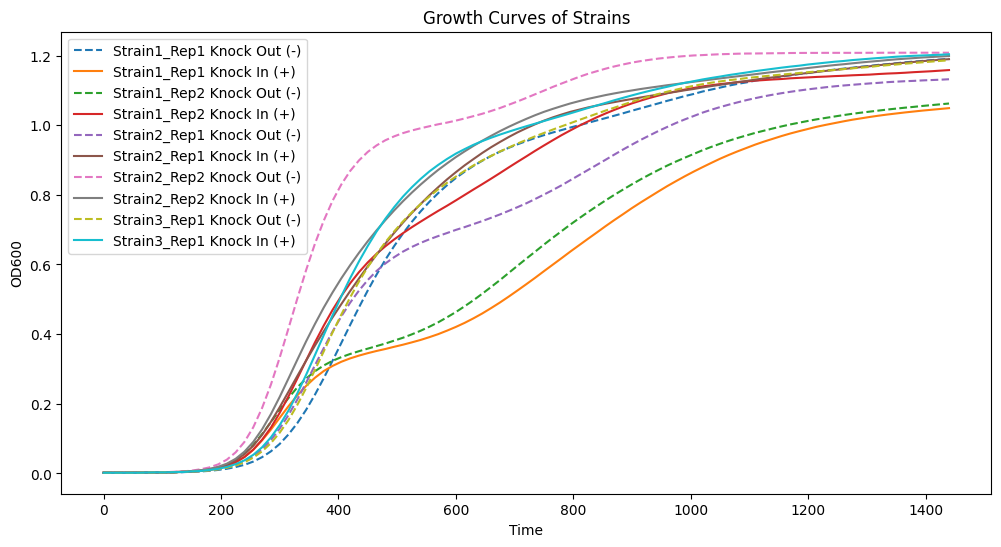

In [6]:
plt.figure(figsize=(12, 6))

for strain in strains:
    # Identify columns based on metadata for knock-out and knock-in
    knock_out_columns = metadata.loc[metadata['Strain'] == strain, ['MUT', 'MUT.1', 'MUT.2']].values.flatten()
    knock_in_columns = metadata.loc[metadata['Strain'] == strain, ['WT', 'WT.1', 'WT.2']].values.flatten()

    # Calculate mean for knock-out and knock-in
    knock_out = data[knock_out_columns].mean(axis=1)
    knock_in = data[knock_in_columns].mean(axis=1)

    # Plot the growth curves
    plt.plot(time, knock_out, label=f'{strain} Knock Out (-)', linestyle='--')
    plt.plot(time, knock_in, label=f'{strain} Knock In (+)')

plt.xlabel('Time')
plt.ylabel('OD600')
plt.title('Growth Curves of Strains')
plt.legend()
plt.show()

In [7]:
# Time to reach carrying capacity
def find_carrying_capacity_time(od_data):
    carrying_capacity = od_data.max()
    return od_data[od_data == carrying_capacity].index[0]  # Return the first occurrence

carrying_capacity_times = {}
for strain in strains:
    knock_out_columns = metadata.loc[metadata['Strain'] == strain, ['MUT', 'MUT.1', 'MUT.2']].values.flatten()
    knock_in_columns = metadata.loc[metadata['Strain'] == strain, ['WT', 'WT.1', 'WT.2']].values.flatten()

    knock_out = data[knock_out_columns].mean(axis=1)
    knock_in = data[knock_in_columns].mean(axis=1)

    carrying_capacity_times[f'{strain} Knock Out (-)'] = find_carrying_capacity_time(knock_out)
    carrying_capacity_times[f'{strain} Knock In (+)'] = find_carrying_capacity_time(knock_in)

# Print the results
for key, value in carrying_capacity_times.items():
    print(f"{key}: {value} time units")

Strain1_Rep1 Knock Out (-): 96 time units
Strain1_Rep1 Knock In (+): 96 time units
Strain1_Rep2 Knock Out (-): 96 time units
Strain1_Rep2 Knock In (+): 96 time units
Strain2_Rep1 Knock Out (-): 96 time units
Strain2_Rep1 Knock In (+): 96 time units
Strain2_Rep2 Knock Out (-): 89 time units
Strain2_Rep2 Knock In (+): 96 time units
Strain3_Rep1 Knock Out (-): 96 time units
Strain3_Rep1 Knock In (+): 96 time units


In [8]:
# Create a DataFrame for carrying capacities
cc_df = pd.DataFrame.from_dict(carrying_capacity_times, orient='index', columns=['Time'])
cc_df['Type'] = ['Knock Out' if 'MUT' in strain else 'Knock In' for strain in cc_df.index]

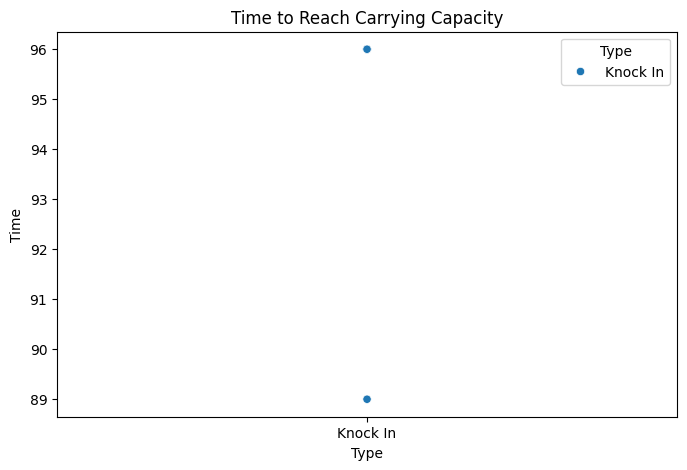

In [9]:
# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=cc_df, x='Type', y='Time', hue='Type')
plt.title('Time to Reach Carrying Capacity')
plt.show()

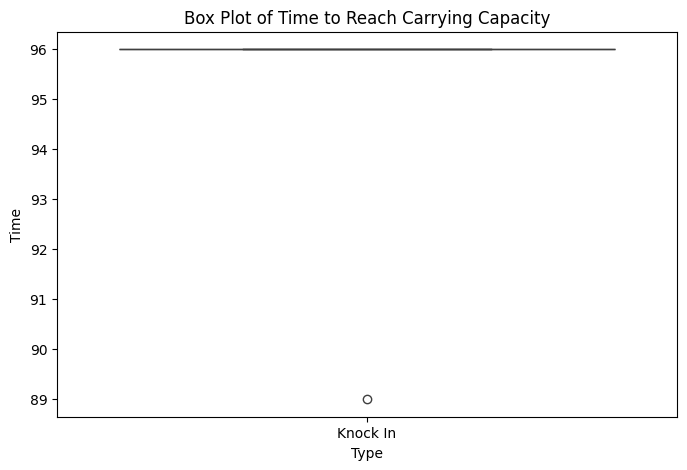

In [10]:
# Box plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=cc_df, x='Type', y='Time')
plt.title('Box Plot of Time to Reach Carrying Capacity')
plt.show()

In [11]:
# Statistical analysis
knock_out_times = cc_df[cc_df['Type'] == 'Knock Out']['Time']
knock_in_times = cc_df[cc_df['Type'] == 'Knock In']['Time']
t_stat, p_value = stats.ttest_ind(knock_out_times, knock_in_times)

# Print results
print(f'T-statistic: {t_stat}, P-value: {p_value}')


T-statistic: nan, P-value: nan


In [12]:
if p_value < 0.05:
    print("There is a statistically significant difference in the time to reach carrying capacity between knock out and knock in strains.")
else:
    print("No statistically significant difference in the time to reach carrying capacity between knock out and knock in strains.")

No statistically significant difference in the time to reach carrying capacity between knock out and knock in strains.


In [13]:
# Observations:
# 1. The growth curves show that different strains have different growth patterns.
# 2. The statistical test helps determine if the observed differences are significant.
# 3. The metadata provides additional strain information, which could be used for further analysis.
